# Unnormalized log transformed: breast, prostate, thyroid

The unnormalized and log transformed breast, prostate and thyroid

In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [2]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
source_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/' + target_file)

rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))


gtex = source shape = (636, 20)
tcga = target shape = (211, 20)


In [4]:
rnaNet.init_res_net()

setting scales using KNN
[24.62721582045824, 49.254431640916479, 98.508863281832959]
setting all scale weights to 1


In [5]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=1000, callbacks=callbacks)

Train on 572 samples, validate on 64 samples
Epoch 1/1000
572/572 [==============================] - 1s 1ms/step - loss: 1.2196 - val_loss: 1.8418
Epoch 2/1000
572/572 [==============================] - 0s 481us/step - loss: 1.1343 - val_loss: 1.6712
Epoch 3/1000
572/572 [==============================] - 0s 484us/step - loss: 1.0737 - val_loss: 1.6845
Epoch 4/1000
572/572 [==============================] - 0s 491us/step - loss: 1.0465 - val_loss: 1.6647
Epoch 5/1000
572/572 [==============================] - 0s 497us/step - loss: 1.0168 - val_loss: 1.6204
Epoch 6/1000
572/572 [==============================] - 0s 486us/step - loss: 1.0013 - val_loss: 1.7254
Epoch 7/1000
572/572 [==============================] - 0s 489us/step - loss: 0.9839 - val_loss: 1.6049
Epoch 8/1000
572/572 [==============================] - 0s 483us/step - loss: 0.9770 - val_loss: 1.5855
Epoch 9/1000
572/572 [==============================] - 0s 495us/step - loss: 0.9857 - val_loss: 1.6022
Epoch 10/1000
572/572

572/572 [==============================] - 0s 658us/step - loss: 0.8781 - val_loss: 1.7105
Epoch 156/1000
572/572 [==============================] - 0s 651us/step - loss: 0.8767 - val_loss: 1.6708
Epoch 157/1000
572/572 [==============================] - 0s 671us/step - loss: 0.8632 - val_loss: 1.5215
Epoch 158/1000
572/572 [==============================] - 0s 677us/step - loss: 0.8835 - val_loss: 1.5266
Epoch 159/1000
572/572 [==============================] - 0s 658us/step - loss: 0.8722 - val_loss: 1.6933
Epoch 160/1000
572/572 [==============================] - 0s 679us/step - loss: 0.8758 - val_loss: 1.5430
Epoch 161/1000
572/572 [==============================] - 0s 686us/step - loss: 0.8825 - val_loss: 1.6912
Epoch 162/1000
572/572 [==============================] - 0s 653us/step - loss: 0.8809 - val_loss: 1.5436
Epoch 163/1000
572/572 [==============================] - 0s 685us/step - loss: 0.8715 - val_loss: 1.7420
Epoch 164/1000
572/572 [==============================] - 0s 

In [6]:
from plots import scatter_plot, heatmap
rnaNet.pca()
%matplotlib inline

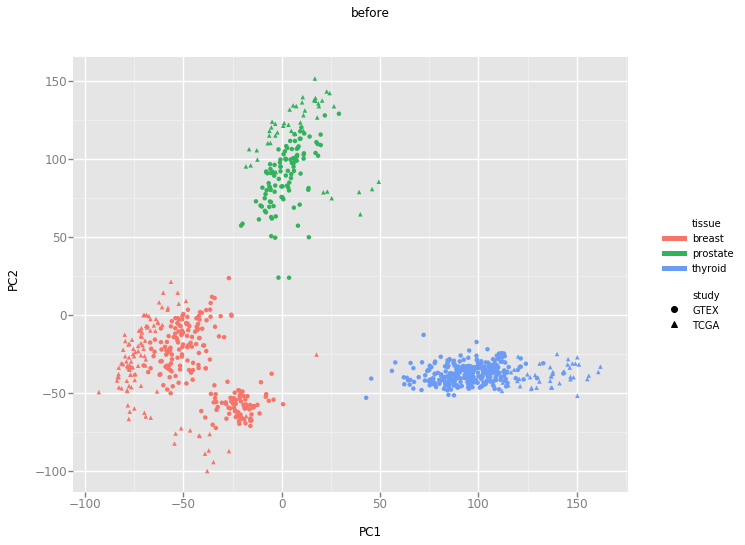

<ggplot: (-9223363249249102199)>


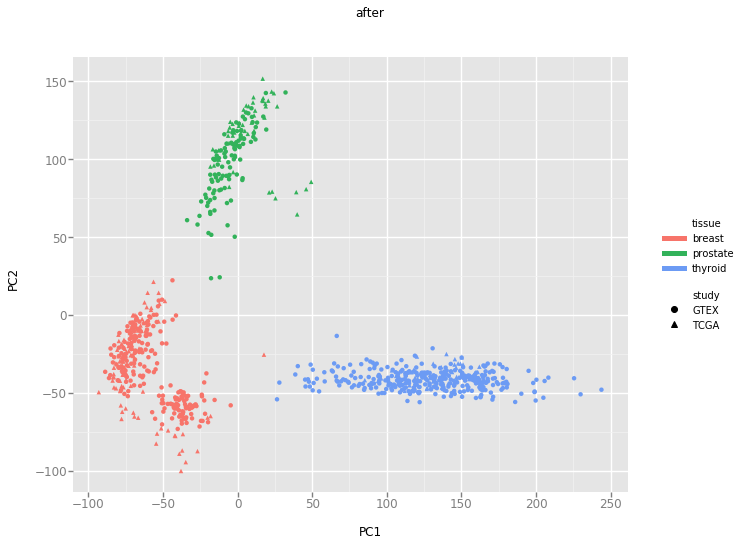

<ggplot: (8787574621409)>


In [7]:
scatter_plot(rnaNet.source_pca_df, rnaNet.target_pca_df, title="before")
scatter_plot(rnaNet.calibrated_source_pca_df, rnaNet.target_pca_df, title="after")

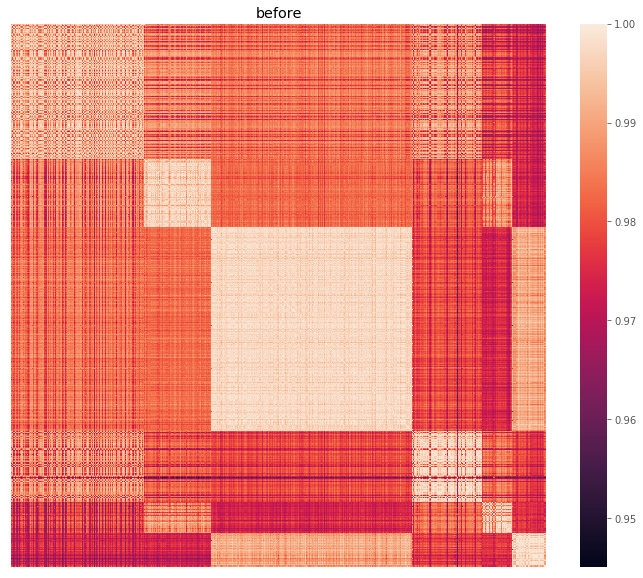

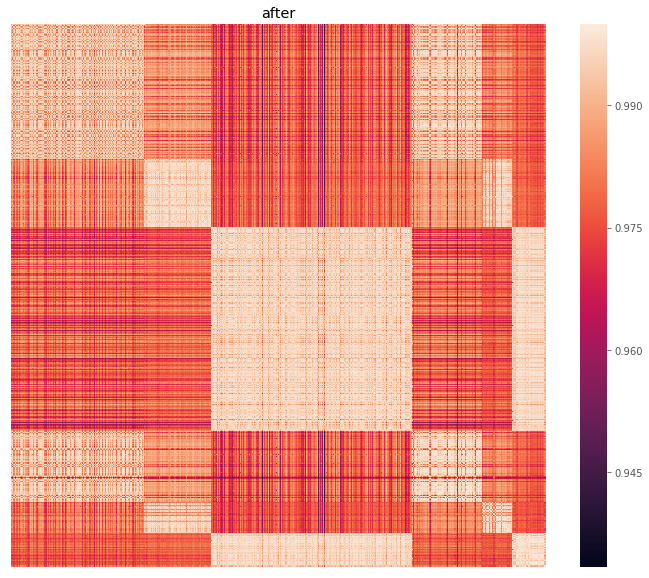

In [8]:
heatmap(rnaNet.source_df, rnaNet.target_df, title="before")
heatmap(rnaNet.calibrated_source_df, rnaNet.target_df, title="after")

In [9]:
import CostFunctions as cf
from keras import backend as K

source = rnaNet.source.astype('float32')
target = rnaNet.target.astype('float32')
calibrated_source = rnaNet.calibrated_source.astype('float32')

mmd = cf.MMD(source, target, MMDTargetSampleSize=target.shape[0], n_neighbors=10)
mmd_before = K.eval(mmd.cost(source, target))
mmd_after = K.eval(mmd.cost(calibrated_source, target))

print("MMD before: %0.10f" % mmd_before)
print("MMD after: %0.10f" % mmd_after)

setting scales using KNN
[20.424087365488184, 40.848174730976368, 81.696349461952735]
setting all scale weights to 1
MMD before: 0.9496130943
MMD after: 0.5526106358


In [ ]:
save_file = 'calibrated-unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
save_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + save_file)

rnaNet.save_calibrated(path=save_path)